

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row

> 1) ScheduledDay’ tells us on what day the patient set up their appointment.                 
  2)‘Neighborhood indicates the location of the hospital.                              
  3)‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
  4)Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and   ‘Yes’ if they did not show up.

In [26]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

First of all we are going to load the data presented

In [27]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv') # load the data 
df.head(10) # present 10 rows from the data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


Here we are going to show all the information of the data types that used for this data se

In [28]:
# present all the information that related to the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [29]:
#to present some statistical information 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We are going to check if there is any duplicated value to clean the data

In [30]:
#check if there is a duplicate or not

a = sum(df.duplicated())
print ("Duplicated number" , a)

Duplicated number 0




### Data Cleaning (Replace this with more specific notes!)

Here we rename two colums SMS_received and No-show

In [31]:
#chenge the name of colums
df.rename(columns = {'SMS_received':'SMS-received','No-show':'NoShow'}, inplace = True)
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS-received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


Here we are going to change the data type of time to be readable for both ScheduledDay and AppointmentDay

In [32]:
# change the ScheduledDay column data type from object to data type date time
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay'].head(10)


0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
5   2016-04-27 08:36:51
6   2016-04-27 15:05:12
7   2016-04-27 15:39:58
8   2016-04-29 08:02:16
9   2016-04-27 12:48:25
Name: ScheduledDay, dtype: datetime64[ns]

In [33]:
# change the AppointmentDay column data type from object to data type date time
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['AppointmentDay'].head(10)


0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
5   2016-04-29
6   2016-04-29
7   2016-04-29
8   2016-04-29
9   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]

Here we are going to clean any Age with -1

In [34]:
# Delete any row that have a cell with -1 Value in Age column
df[df.Age != -1]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS-received,NoShow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


In [35]:
# need to change the show data to numaric value to make it easy when compare it with the Plot
df.NoShow[df.NoShow == 'No']=0
df.NoShow[df.NoShow == 'Yes']=1
df['NoShow'] = pd.to_numeric(df['NoShow'])
df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS-received,NoShow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


### Summurise Data cleaning:
1) we check some statistical                                                                
2) check the duplication                                                           
3) Change the colums name (SMS_received and No-show)                                                  
4) change the Value of Noshow colums to numaric value (0,1) to be useful when using in Plot                     
5) Change the datatype of the AppointmentDay and ScheduledDay from Object to date time                                  
6) Delete any row with -1 in the Age columns               

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (How many show up from the gender in the appoitment)
### In the below Plot we choose the Gender and Noshow columns to show the average visiting to the  Hosbital from which Gender, We took the mean for Gender and No show column to compare it who is the most gender to visiting the Hosbital

Text(0.5,1,'Figure to present the patinet Gender who showed')

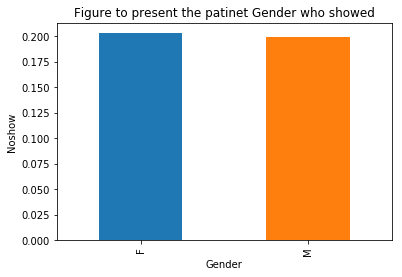

In [36]:
# in the below plot we are going to compare the Gender if shows in the appoitment or not

df.groupby('Gender')['NoShow'].mean().plot(kind='bar',alpha=1)
plt.xlabel("Gender")
plt.ylabel("Noshow")
plt.title("Figure to present the patinet Gender who showed")


<a id='eda'></a>
### Research Question 2 (How many show up in the Appointment day)
### In the below Plot we are going to Compare the No show and AppointmentDay columns to find the Average visiting of the patient in Which day 

Text(0.5,1,'Compare How many Patients Show/ No show in the appoitment day ')

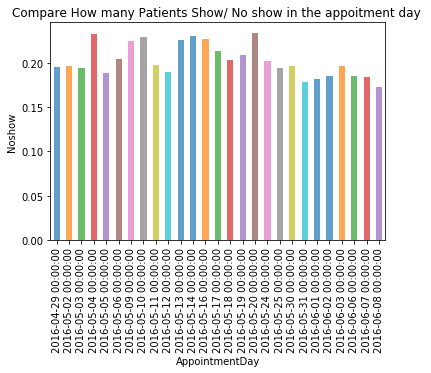

In [37]:
# in the below plot we are going to compare what is the most Adppoitment day the Patient come
df.groupby('AppointmentDay')['NoShow'].mean().plot(kind='bar',alpha=.7)
plt.xlabel("AppointmentDay")
plt.ylabel("Noshow")
plt.title("Compare How many Patients Show/ No show in the appoitment day ")


### Research Question 2  (What is the average Age for the Patient)
### In the below Plot we search on the Average Age that visiting in the Hosbital 

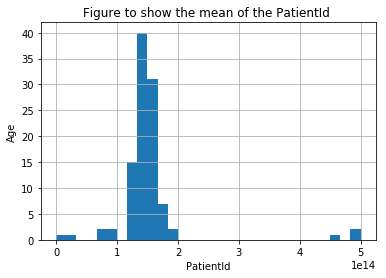

In [38]:
# in the below plot we see what is the average age for the patients who com to the hosbital 

Agedf = df.groupby('Age')['PatientId'].mean().hist(alpha=1,bins=30,label='show')
plt.title('Figure to show the mean of the PatientId ')
plt.xlabel('PatientId')
plt.ylabel('Age');


<a id='conclusions'></a>
## Conclusions


The limitation:                                                    
1) In the dataset we don't have enough information.                            
2) some data dosen't make scence like the patient with age -1.                                   
3) column Noshow made some confusing in the begging when read a data.

Result:                                                            
1) We can see most of the patients come to their appoitment.                                              
2) The Average of the Age for patients it's between 20-35 years old.  






In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0